In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.groundtruth_keypoint_dataset import GroundTruthKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/processed_syntheticCabin_1m/A_Pillar_Codriver/')
keypoint_2d_path = dataset_root_path / 'annotations'
keypoint_3d_path = dataset_root_path / 'annotations'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 200
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_knee=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/'


train_dataset = GroundTruthKeypointDataset(
    annotation_file=(keypoint_3d_path / 'person_keypoints_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)
val_dataset = GroundTruthKeypointDataset(
    annotation_file=(keypoint_3d_path / 'person_keypoints_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)
test_dataset = GroundTruthKeypointDataset(
    annotation_file=(keypoint_3d_path / 'person_keypoints_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 75000 val_dataset 37500 test_dataset 30349


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 1481814.3310546875
activity_macro_mpjpe nan


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 5855 batches: 243.80526751356183
val MPJPE from: 37440 samples : 76.57582312822342
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #2
training loss from 5855 batches: 109.30283978059697
val MPJPE from: 37440 samples : 70.86794823408127
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #3
training loss from 5855 batches: 103.18245889283368
val MPJPE from: 37440 samples : 68.4514120221138
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #4
training loss from 5855 batches: 99.44213867874659
val MPJPE from: 37440 samples : 66.7501613497734
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #5
training loss from 5855 batches: 97.04010125590023
val MPJPE from: 37440 samples : 64.66235220432281
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #6
training loss from 5855 batches: 95.20526677497324
val MPJPE from: 37440 samples : 65.29860198497772
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #7
training loss from 5855 batches: 93.84861990720364
val MPJPE from: 37440 samples : 63.51406127214432
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #8
training loss from 5855 batches: 92.7902049737339
val MPJPE from: 37440 samples : 62.69141286611557
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #9
training loss from 5855 batches: 91.9832114298867
val MPJPE from: 37440 samples : 62.5409334897995
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #10
training loss from 5855 batches: 91.36722286627091
val MPJPE from: 37440 samples : 61.90500035881996
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #11
training loss from 5855 batches: 90.77012211109816
val MPJPE from: 37440 samples : 61.6365484893322
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #12
training loss from 5855 batches: 90.31967075587745
val MPJPE from: 37440 samples : 61.057593673467636
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #13
training loss from 5855 batches: 90.02110190136018
val MPJPE from: 37440 samples : 62.06727772951126
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #14
training loss from 5855 batches: 89.69541999211584
val MPJPE from: 37440 samples : 61.65463104844093
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #15
training loss from 5855 batches: 89.41248175326216
val MPJPE from: 37440 samples : 61.23451888561249
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #16
training loss from 5855 batches: 89.26828373303076
val MPJPE from: 37440 samples : 61.159536242485046
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #17
training loss from 5855 batches: 89.12086051106961
val MPJPE from: 37440 samples : 61.491549015045166
activity_macro_mpjpe nan


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/lightning_logs/version_3/checkpoints/epoch=59-step=70260.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/gt_2d/lightning_logs/version_3/checkpoints/epoch=59-step=70260.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 61.99003073585039
PJPE
                      PJPE
nose             50.720666
left_eye         49.155583
right_eye        49.987137
left_ear         45.105734
right_ear        45.496932
left_shoulder    16.261650
right_shoulder   16.249817
left_elbow       76.198147
right_elbow      64.326988
left_wrist      120.253284
right_wrist     105.650544
left_hip         84.154477
right_hip        82.309439
activities_mpjpe:
{}
test mpjpe: 61.99003073585039
activity_macro_mpjpe nan


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     61.99003073585039     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 61.99003073585039}]

In [3]:
trainer.model.test_history[0]['pjpe']

,PJPE
nose,50.720666
left_eye,49.155583
right_eye,49.987137
left_ear,45.105734
right_ear,45.496932
left_shoulder,16.261650
right_shoulder,16.249817
left_elbow,76.198147
right_elbow,64.326988
left_wrist,120.253284


In [4]:
trainer.model.test_history[0]['mpjpe']

61.99003073585039

[773.0, 416.0, 1239.0, 1004.0]
[658.0, 266.0, 1050.0, 840.0]
[906.0, 152.0, 1604.0, 980.0]


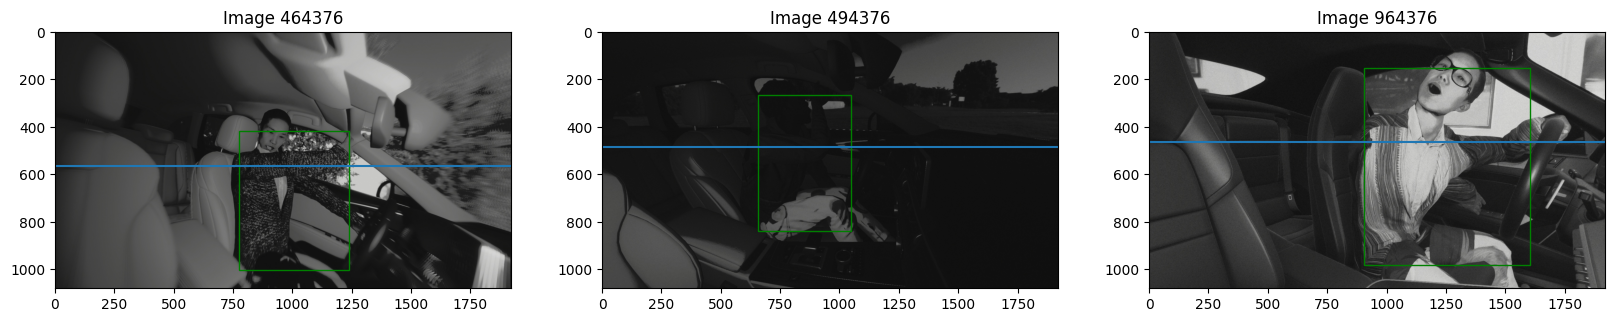

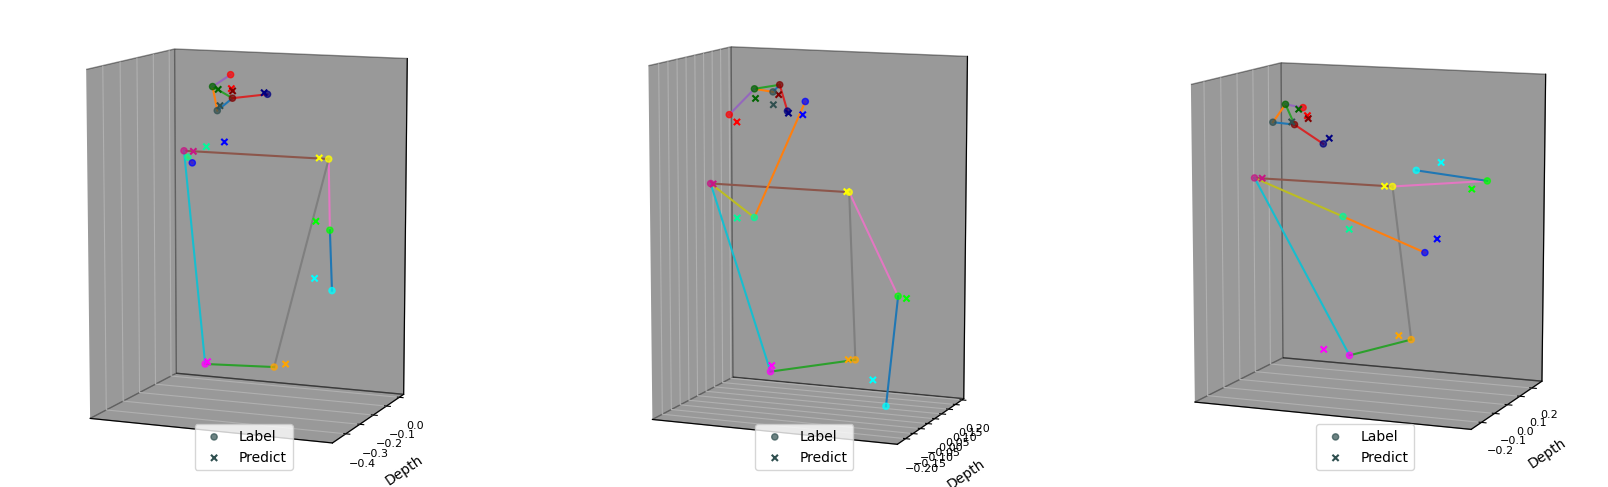

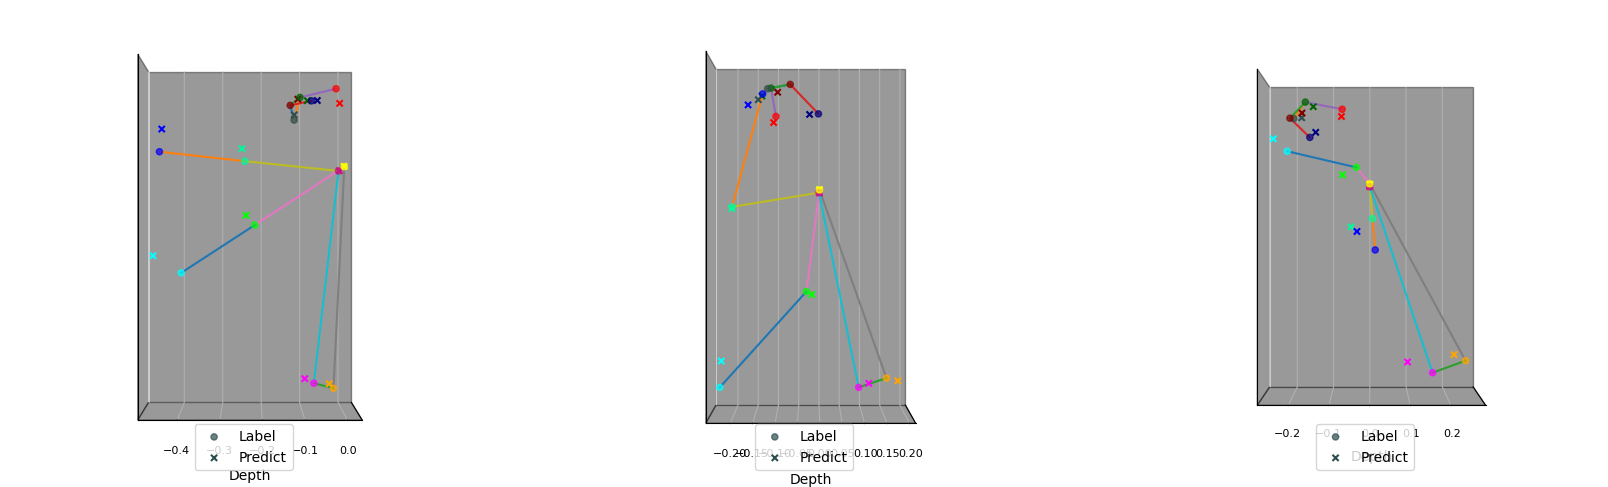

In [5]:
plot_samples(
    dataset_root_path,
    trainer.model,
    test_loader,
    'test',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_idices=[5000, 10000, 30000]
)